For this assignment, we are going to look at the jevons dataset to analyze the relationship between the weight of coins to their age which will serve as the sole predictor variable, as always we will start off with exploratory data analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smplot  
from statsmodels.stats.diagnostic import het_breuschpagan as ncvTest
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import t 
from scipy.stats import boxcox
from scipy.stats import boxcox_normplot
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer



jevons = pd.read_csv("http://users.stat.umn.edu/~sandy/alr4ed/data/jevons.csv")
jevons.head()


Unnamed: 0  Age    n  Weight       SD    Min    Max
0           1    1  123  7.9725  0.01409  7.900  7.999
1           2    2   78  7.9503  0.02272  7.892  7.993
2           3    3   32  7.9276  0.03426  7.848  7.984
3           4    4   17  7.8962  0.04057  7.827  7.965
4           5    5   24  7.8730  0.05353  7.757  7.961

In [2]:
jevons.describe(include="all")

Unnamed: 0       Age           n    Weight        SD       Min  \
count    5.000000  5.000000    5.000000  5.000000  5.000000  5.000000   
mean     3.000000  3.000000   54.800000  7.923920  0.033034  7.844800   
std      1.581139  1.581139   44.963318  0.040096  0.015359  0.057686   
min      1.000000  1.000000   17.000000  7.873000  0.014090  7.757000   
25%      2.000000  2.000000   24.000000  7.896200  0.022720  7.827000   
50%      3.000000  3.000000   32.000000  7.927600  0.034260  7.848000   
75%      4.000000  4.000000   78.000000  7.950300  0.040570  7.892000   
max      5.000000  5.000000  123.000000  7.972500  0.053530  7.900000   

            Max  
count  5.000000  
mean   7.980400  
std    0.016817  
min    7.961000  
25%    7.965000  
50%    7.984000  
75%    7.993000  
max    7.999000

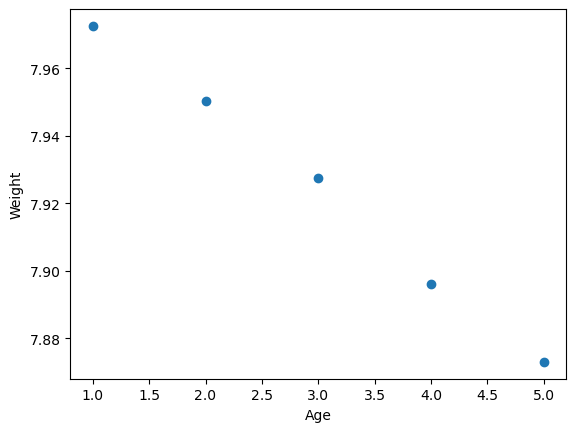

In [3]:
plt.figure() 
plt.scatter(jevons["Age"], jevons["Weight"])
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

Looking at the data, it seems as if we are working with summary statistcs. This tells us that we may have to use weights in order to tackle the variance situation if we are dealing with mulitple observations for each age. We will first fit our model using only standard OLS, then we will check the model using WLS to see if it fits it better. 

In [4]:
Weight = jevons["Weight"] 
Age = jevons["Age"]
Age_c = sm.add_constant(Age)  
mod = sm.OLS(Weight, Age_c).fit()
WeightHat = mod.predict(Age_c)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     776.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           0.000101
Time:                        22:07:46   Log-Likelihood:                 23.446
No. Observations:                   5   AIC:                            -42.89
Df Residuals:                       3   BIC:                            -43.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9998      0.003   2655.736      0.0

C:\Users\tariq\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [5]:
jevonncvTest = ncvTest(mod.resid, mod.model.exog)
labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]
print(dict(zip(labels, jevonncvTest)))

{'BP statistic': np.float64(0.05345073232614128), 'BP p-value': np.float64(0.8171639790161467), 'f-value': np.float64(0.03241698167778073), 'f p-value': np.float64(0.868590661266063)}


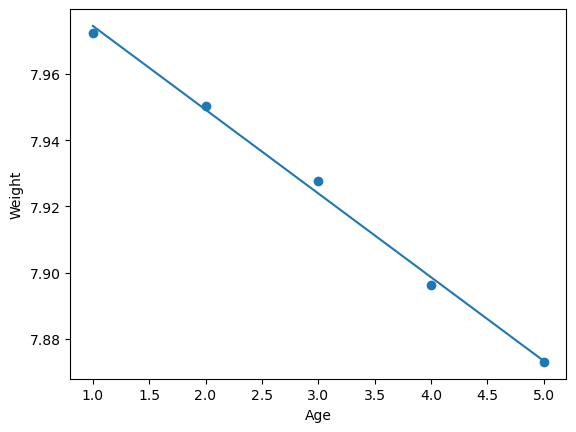

In [6]:
plt.figure()
plt.scatter(jevons["Age"], jevons["Weight"])
plt.plot(Age, WeightHat)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

We see the line going through the data, however, with this being summary statistics, we know that we are dealing with different variances at each data point of age. Although the NCV Test tells us there is homoscedasticity, we can still try to plot out the residuals against the fitted values as well.

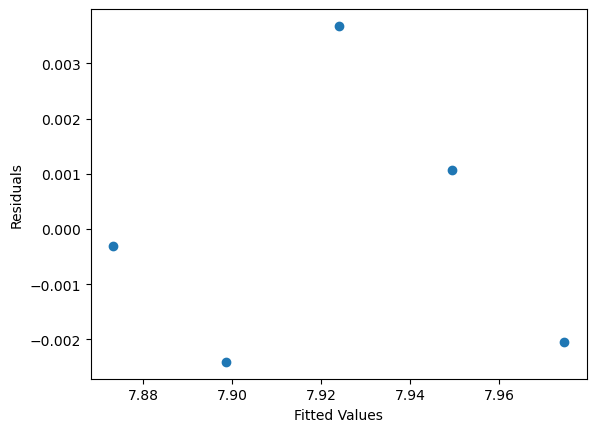

In [7]:
plt.figure()
plt.scatter(mod.fittedvalues, mod.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

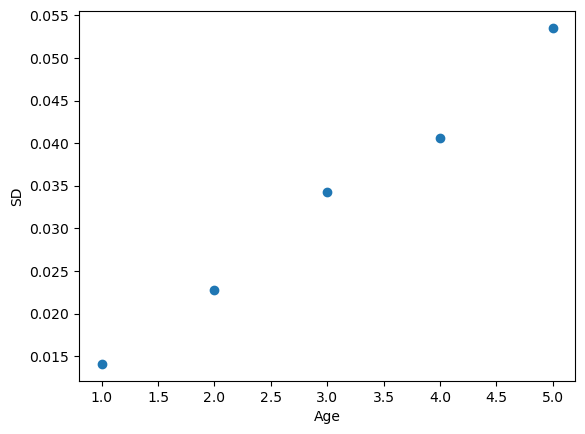

In [8]:
plt.figure()
plt.scatter(jevons["Age"], jevons["SD"])
plt.xlabel("Age")
plt.ylabel("SD")
plt.show()

It is very difficult to tell from the first plot, however the second plot shows that as age increases, the variances also increases. For the purpose of predictions, we will add weights using Weighted Least Squares because that will allow us to predict better on datapoints where there is little to no variation. Dealing with summary statistics, we want to use the inverse of the variance which for this case is variance/n, so the inverse will be n/variance.


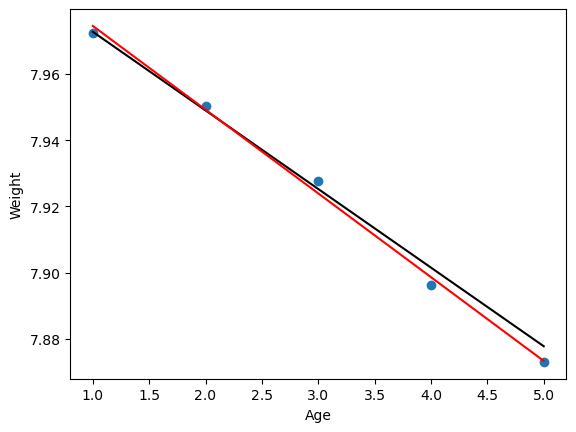

In [9]:
weights = jevons["n"]/(jevons["SD"]**2)

modw = sm.WLS(Weight, Age_c, weights = weights).fit()  
WeightHat2 = modw.predict(Age_c)

plt.figure() 
plt.scatter(jevons["Age"], jevons["Weight"])
plt.plot(Age, WeightHat2, color="black")
plt.plot(Age, WeightHat, color="red") 
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()


Looking at the lines from our two models, the black line is from the WLS model and the red is OLS. As stated before, weights allow for better predictions in datapoints with very little variation, so for this we can see that our predictions will be best at ages 1-2, but once we reach age 3 and above, we experience more variation.

In [10]:
print(mod.summary())
print(modw.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     776.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           0.000101
Time:                        22:07:47   Log-Likelihood:                 23.446
No. Observations:                   5   AIC:                            -42.89
Df Residuals:                       3   BIC:                            -43.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9998      0.003   2655.736      0.0

C:\Users\tariq\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\tariq\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Looking at the summary for both fits, they do not differ much. With all things considered, they tell us without any predictors, our coins are at 7.9985 and 7.9965 for the OLS and WLS models respectively. Both those figures are above the standard weight for new coins of 7.9876 grams and the minimum legal weight at 7.9379 grams. As the year increases one unit, both coins lose weight. The OLS shows there is a decrease of -0.025 in grams for every increase in year. The WLS says something similar, as the year increases, there is a reduction in weight by -0.02376. This shows we can predict the weight after year one and two but then afterwards it begins to become more difficult.  

Our next problem, we will look at the relationship between the speed of a single car and the distance it stops at. As always, we will start with EDA before creating any fits. We are only working with two variables so Speed will serve as our response. 


In [11]:
stopping = pd.read_csv("http://users.stat.umn.edu/~sandy/alr4ed/data/stopping.csv")
stopping.head()

Unnamed: 0  Speed  Distance
0           1      4         4
1           2      5         2
2           3      5         4
3           4      5         8
4           5      5         8

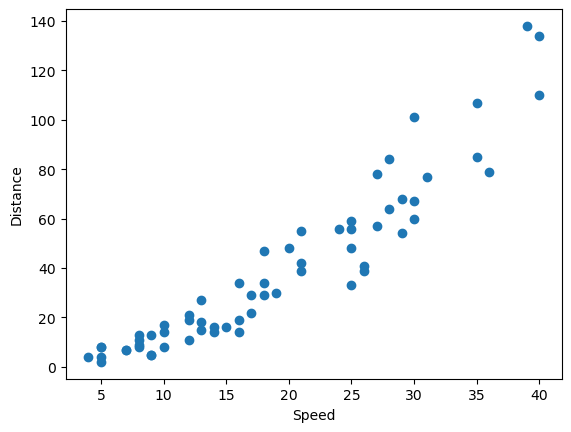

In [12]:
plt.figure()
plt.scatter(stopping["Speed"], stopping["Distance"]) 
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

We see evidence of a non-constant variance so we will address that, but first, we will fit the line

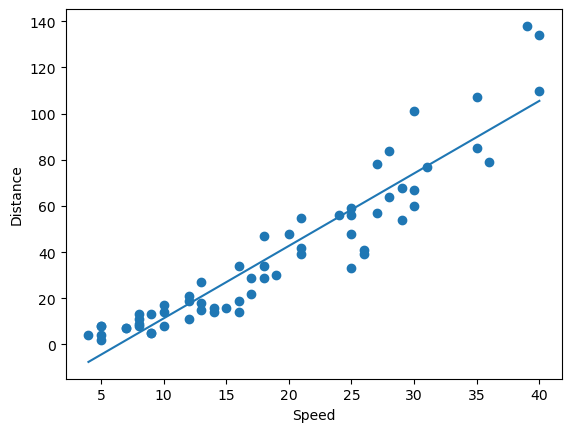

In [13]:
Speed = stopping["Speed"]
Speed_c = sm.add_constant(Speed)
Distance = stopping["Distance"]
stop = sm.OLS(Distance, Speed_c).fit()
DistanceHat = stop.predict(Speed_c)  

plt.figure()
plt.scatter(stopping["Speed"], stopping["Distance"])
plt.plot(Speed, DistanceHat)
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

Our fitted line seems to fit the data pretty well, but we also suspect non-constant variance so let us look at a plot of the residuals against the fitted values. 

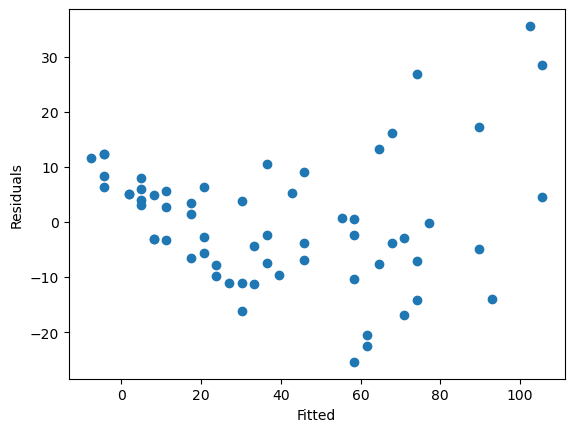

In [14]:
plt.figure()
plt.scatter(stop.fittedvalues, stop.resid)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.show()

In [15]:
stopncvTest = ncvTest(stop.resid, stop.model.exog) 
labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]
print(dict(zip(labels, stopncvTest)))

{'BP statistic': np.float64(14.535029961858848), 'BP p-value': np.float64(0.00013757745093772117), 'f-value': np.float64(18.373587869343243), 'f p-value': np.float64(6.683146221502917e-05)}


With the plot looking like a slight megaphone and our test show that we do indeed have a non-constant variance. Now, we must decide how to handle this non-constant variance. Since we are only working with a single, it would be a bit difficult to figure out the variance at each point. We will try three different weights that will allow us the keep the weights positive. 


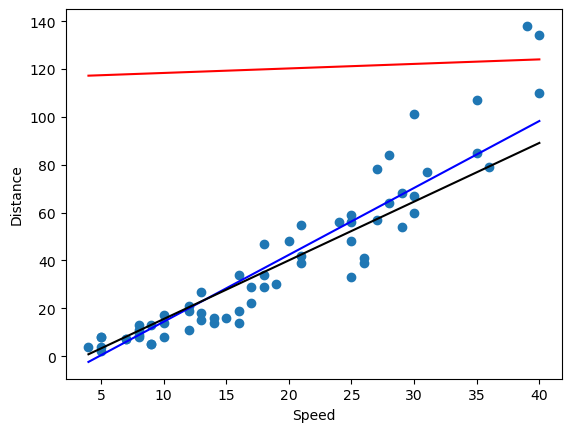

In [16]:
stopweights = 1/abs(stopping["Speed"])
stopweights2 = 1/(stopping["Speed"]**2)
stopweights3 = np.exp(stopping["Speed"])  

stop2 = sm.WLS(Distance, Speed_c, weights = stopweights).fit() 
WDistanceHat = stop2.predict(Speed_c) 

stop3 = sm.WLS(Distance, Speed_c, weights = stopweights2).fit()
WDistanceHat2 = stop3.predict(Speed_c)

stop4 = sm.WLS(Distance, Speed_c, weights = stopweights3).fit()
WDistanceHat3 = stop4.predict(Speed_c)

plt.figure()
plt.scatter(stopping["Speed"], stopping["Distance"])
plt.plot(Speed, WDistanceHat,  color="blue")
plt.plot(Speed, WDistanceHat2, color="black")
plt.plot(Speed, WDistanceHat3, color="red")
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

We used three different models with different weights. The blue line corresponds to our weight using the inverse absolute value of speed. The black line uses the inverse of the square of speed. The red line is just the exponent of speed. Clearly, the red line does not fit the data at all. Therefore, we can weed that out and only focus on the inverses of the square of speed and the absolute value of speed.

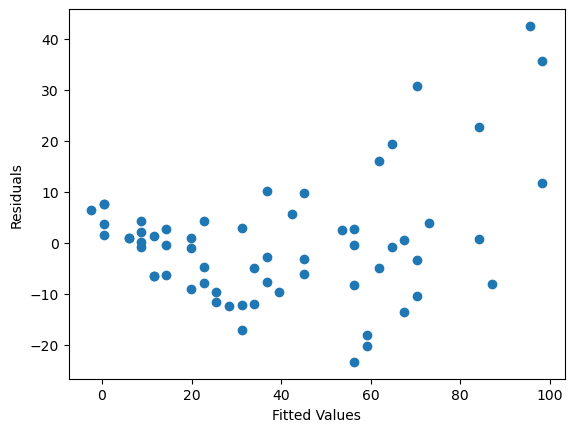

In [17]:
plt.figure() 
plt.scatter(stop2.fittedvalues, stop2.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [18]:
stop2ncvTest = ncvTest(stop2.resid, stop2.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

print(dict(zip(labels, stop2ncvTest)))

{'BP statistic': np.float64(16.106841701508632), 'BP p-value': np.float64(5.986736455573233e-05), 'f-value': np.float64(21.057833845405373), 'f p-value': np.float64(2.324435359759489e-05)}


The inverse of the absolute value fixes the heteroscedasticity a bit, however we still see some non-constant variance. We fail to reject the null at almost every standard level.

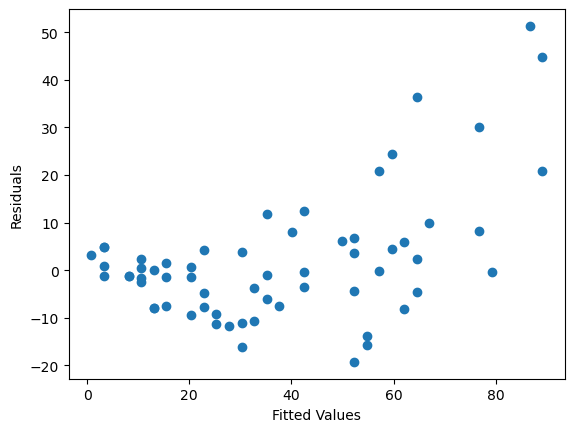

In [19]:
plt.figure()
plt.scatter(stop3.fittedvalues, stop3.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [20]:
stop3ncvTest = ncvTest(stop3.resid, stop3.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

print(dict(zip(labels, stop3ncvTest)))

{'BP statistic': np.float64(17.151344177689825), 'BP p-value': np.float64(3.4516506778972634e-05), 'f-value': np.float64(22.945629736119514), 'f p-value': np.float64(1.1326342960253626e-05)}


The plot and the NCV Test for the inverse of the square of speed is much better as we accept the null at almost every level. Although the plot does still show a bit of a megaphone shape. For this problem, it seems as if the inverse of the square of speed is the best, so we will go with that and evaluate.

In [21]:
print(stop3.summary())

                            WLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.856
Model:                            WLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     357.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           5.81e-27
Time:                        22:07:48   Log-Likelihood:                -225.02
No. Observations:                  62   AIC:                             454.0
Df Residuals:                      60   BIC:                             458.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0458      1.426     -6.345      0.0

Looking at the summary, we can see that the intercept tells as that if there was no speed, our car will stop at a distance of -9.0458 which does not make sense as we will be deceleration. For each unit increase of speed, we can expect the distance that we stop at to decrease by 2.4537. We also see that Speed is a significant variable. 

For our next problem we will be looking at the MinnLand data which shows the relationship of acre prices per acre for farms in Minnesota. The acre price will be our response, or acrePrice. For predictors we will use the percentage of property value due to improvements, acre size of the farm, percentage of farm acreage that is rated arable by an assessor, productivity of each farm, the year of sale of the farm, and the percentage of all farm acres enrolled in the Federal Conservation Reserve Program. 

In [22]:
MinnLand = pd.read_csv("http://users.stat.umn.edu/~sandy/alr4ed/data/MinnLand.csv")
MinnLand.head()

Unnamed: 0  acrePrice     region  improvements  year  acres  tillable  \
0           1        766  Northwest           0.0  2002     82      94.0   
1           2        733  Northwest           0.0  2003     30      63.0   
2           3        850  Northwest           4.0  2002    150      47.0   
3           4        975  Northwest           0.0  2003    160      86.0   
4           5        886  Northwest          62.0  2002     90       NaN   

        financing  crpPct  productivity  
0  title_transfer       0           NaN  
1  title_transfer       0           NaN  
2  title_transfer       0           NaN  
3  title_transfer       0           NaN  
4  title_transfer       0           NaN

In [23]:
MinnLand.describe(include="all")

Unnamed: 0     acrePrice   region  improvements          year  \
count   18700.000000  18700.000000    18700  18650.000000  18700.000000   
unique           NaN           NaN        6           NaN           NaN   
top              NaN           NaN  Central           NaN           NaN   
freq             NaN           NaN     4198           NaN           NaN   
mean     9350.500000   2787.333529      NaN      4.492922   2006.437273   
std      5398.369353   1914.040040      NaN     12.935014      2.507632   
min         1.000000    108.000000      NaN      0.000000   2002.000000   
25%      4675.750000   1425.000000      NaN      0.000000   2004.000000   
50%      9350.500000   2442.000000      NaN      0.000000   2006.000000   
75%     14025.250000   3702.000000      NaN      0.000000   2008.000000   
max     18700.000000  15000.000000      NaN    100.000000   2011.000000   

               acres      tillable       financing        crpPct  productivity  
count   18700.000000  17488.000000           18700  18700.000000   8983.000000  
unique           NaN           NaN               2           NaN           NaN  
top              NaN           NaN  title_transfer           NaN           NaN  
freq             NaN           NaN           16601           NaN           NaN  
mean      112.685508     80.674062             NaN      4.162941     66.631415  
std       128.457290     22.802167             NaN     17.165930     13.483459  
min         1.000000      0.000000             NaN      0.000000      1.000000  
25%        47.000000     72.000000             NaN      0.000000     59.000000  
50%        80.000000     92.000000             NaN      0.000000     68.000000  
75%       153.000000     97.000000             NaN      0.000000     76.000000  
max      6970.000000    100.000000             NaN    100.000000     99.000000

In [24]:
MinnLandclean = MinnLand.dropna(subset=["improvements", "year", "acres", "tillable", "crpPct", "productivity"])

Y = MinnLandclean["acrePrice"] 
X = MinnLandclean[["improvements", "year", "acres", "tillable", "crpPct", "productivity"]]
X_cons = sm.add_constant(X)
acrefit = sm.OLS(Y, X_cons).fit()

acrefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              acrePrice   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:07:49   Log-Likelihood:                -73756.
No. Observations:                8770   AIC:                         1.475e+05
Df Residuals:                    8763   BIC:                         1.476e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.809e+05   9651.388    -70.554      0.000      -7e+05   -6.62e+05
improvements    54.3730      1.403     38.742      0.000      51.622      57.124
year           339.2988      4.812     70.513      0.000     329.866     348.731
acres           -1.9794      0.132    -14.960      0.000      -2.239      -1.720
tillable         6.6868      0.826      8.092      0.000       5.067       8.307
crpPct          -9.8224      0.876    -11.214      0.000     -11.539      -8.105
productivity    40.6396      0.938     43.314      0.000      38.800      42.479
==============================================================================
Omnibus:                     4080.632   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49671.547
Skew:                           1.914   Prob(JB):                         0.00
Kurtosis:                      14.013   Cond. No.                     1.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Running the model as is tells us several things. First and foremost, all the variables seem to be significant. With all things equal to 0, we can expect acre prices to be around -6.809e+05 which does not make too much sense so we see it as a tuning parameter. For every unit increase of improvements, the acre price increases by 54.37. For every increase in year, the acre price increases by 339.3. For every increase in acres we expect a decrease of 1.979 in acre prices. An increase in tillable increases acre prices by 6.687. An increase in all the farms enrolled in the National Conservation Reserve program decreases acre prices by 9.822 and finally an increase by one unit in productivity increases acre prices by 40.64. We fit our model without checking for any of our assumptions; linearity, homoscedasticity, no multicollinearity, normality, independence of errors, and no major outliers.

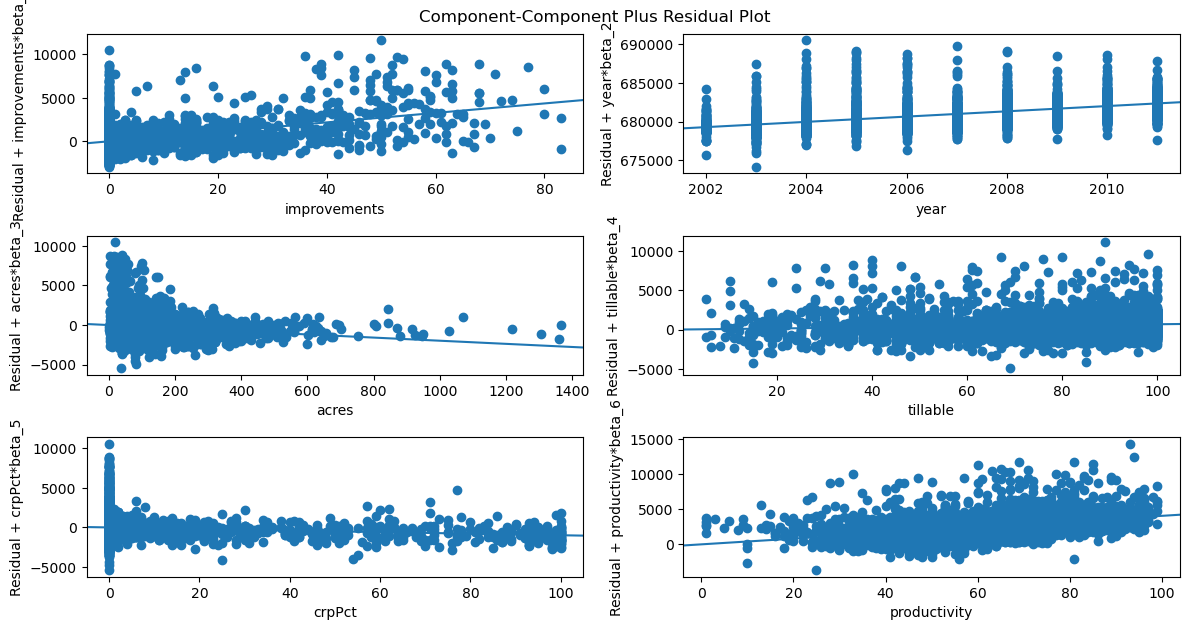

<Wald test (chi2): statistic=418.8582106784146, p-value=1.1119754555646661e-91, df_denom=2>


In [25]:
fig = sm.graphics.plot_ccpr_grid(acrefit, fig=plt.figure(figsize=(12,8)))
plt.show()
print(sm.stats.diagnostic.linear_reset(acrefit))

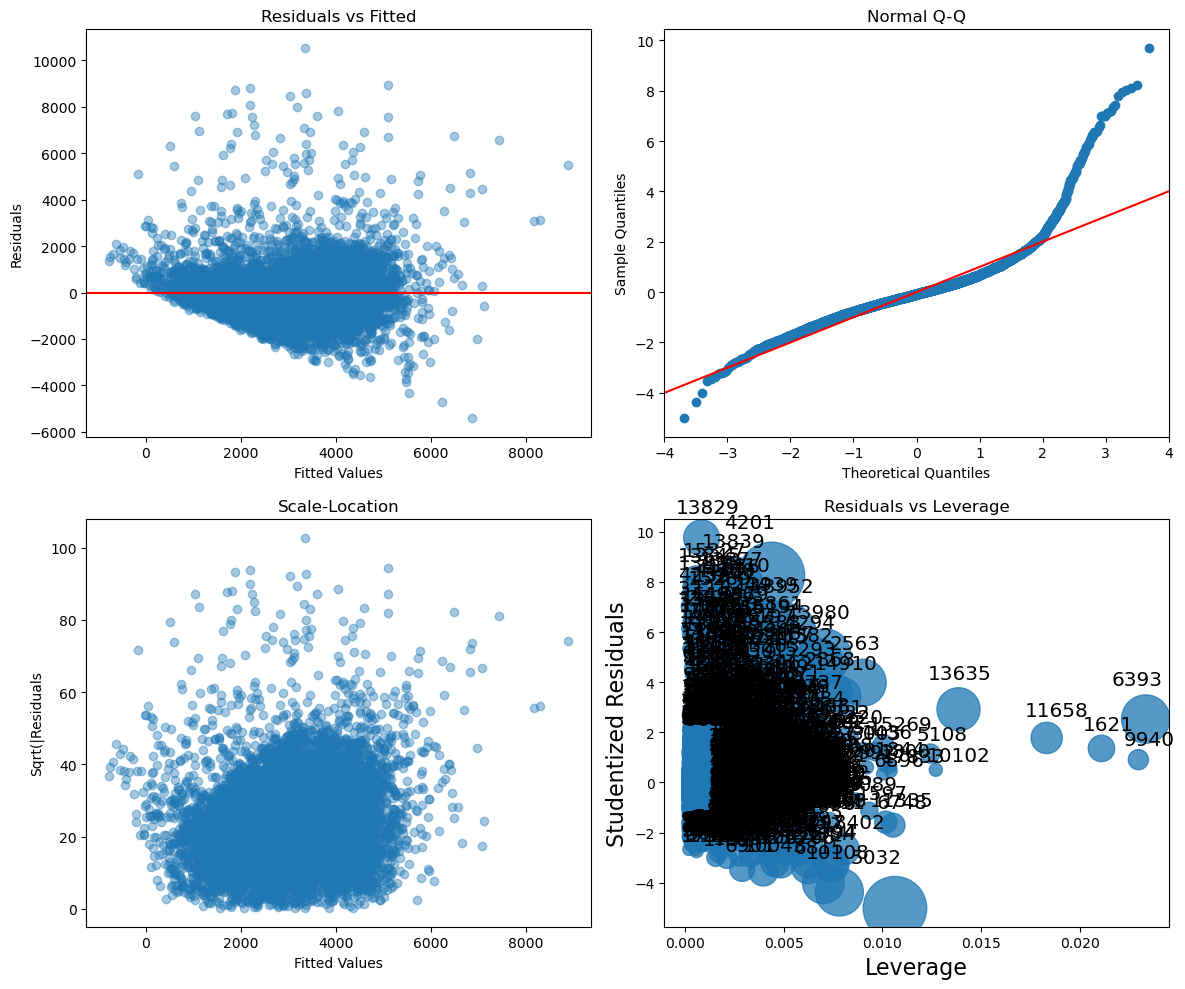

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12,10))


axes[0,0].scatter(acrefit.fittedvalues, acrefit.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(acrefit.get_influence().resid_studentized_internal, line="45", ax=axes[0,1])
axes[0,1].set_title("Normal Q-Q")
axes[0,1].set_xlim(-4,4)
axes[1,0].scatter(acrefit.fittedvalues, np.sqrt(np.abs(acrefit.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(acrefit, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()

In [27]:
minnlandncvtest = ncvTest(acrefit.resid, acrefit.model.exog)

labels = ["BP statistic", "BP p-value", "f p-value", "f-value"]

for stat, score in zip(labels, minnlandncvtest):
    print(f"{stat}:{score: .4f}")

BP statistic: 654.6126
BP p-value: 0.0000
f p-value: 117.8085
f-value: 0.0000


In [28]:
rstudent  = OLSInfluence(acrefit).resid_studentized_external
df = acrefit.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)
outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
13829  9.752752        0.000000e+00      0.000000e+00
4201   8.255463        2.220446e-16      1.947331e-12
13845  8.123208        4.440892e-16      3.894662e-12
15327  8.043726        1.110223e-15      9.736656e-12
13839  7.962849        1.776357e-15      1.557865e-11
13855  7.819588        5.995204e-15      5.257794e-11
4232   7.460543        9.436896e-14      8.276158e-10
13877  7.392291        1.576517e-13      1.382605e-09
13856  7.228721        5.284662e-13      4.634648e-09
4165   7.154698        9.059420e-13      7.945111e-09

Looking at our diagnostic tests, it looks as if we have several violations in homoscedasticity, linearity, and normality. The qq-residual plot, we can see the tails veering a bit off. The variance also fails the ncv Test as we reject the null hypothesis that all variance is the same. We also have a low p-value for the tukey test. One thing we can say though is that there does not seem to be any major outliers. Since our assumption of normality is violated along with the absence of a constant variance, we can look about doing transformations to kill several birds with one stone. We will transform the response first. We will use both the boxcox function as well as the invResPlot to see the lambda choices visually

In [29]:

cols = ["improvements", "year", "acres", "tillable", "crpPct", "productivity"]
df = MinnLand.dropna(subset=cols).copy()
y = df["acrePrice"].to_numpy()
x = sm.add_constant(df[cols].to_numpy())

gm = np.exp(np.mean(np.log(y)))
def rss_for_lambda(lam):
    if lam == 0:
        y_t = gm * np.log(y)
    else:
        y_t = gm**(1-lam) * (y**lam - 1) / lam
    res = sm.OLS(y_t, x).fit()
    return (res.resid ** 2).sum()

grid = np.linspace(-2, 2, 161)
rss_vals = np.array([rss_for_lambda(l) for l in grid])
best_lam = grid[np.argmin(rss_vals)]
print("Regression-based best lambda:", best_lam)

Regression-based best lambda: 0.3250000000000002


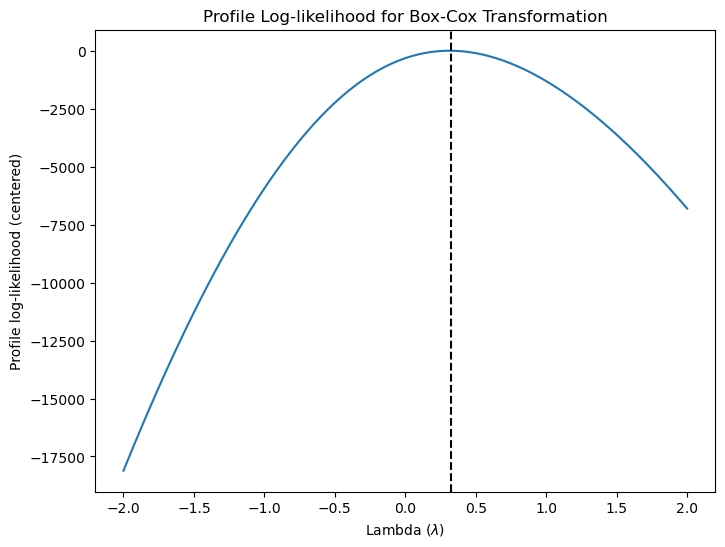

In [30]:
n = len(y)

loglik = -0.5 * n * np.log(rss_vals/n)

loglik_centered = loglik - loglik.max() 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(grid, loglik_centered, "-")
ax.set_xlabel(r"Lambda ($\lambda$)")
ax.set_ylabel("Profile log-likelihood (centered)")
ax.set_title("Profile Log-likelihood for Box-Cox Transformation")
ax.axvline(best_lam, color="k", linestyle="--",
           label = f"Best Lambda = {best_lam: .2f}")

Based on both methods a power of .32 provides the lowest residual sum of squares. The second best choice is a power transformation of 0, which we know will turn any number to 1. For data scientists, we use 0 as log. First, we will look into doing the recommended transformation for the response. 


In [31]:
Y_bc = MinnLandclean["acrePrice"]**.32
acrefit2 = sm.OLS(Y_bc, X_cons).fit()

print(acrefit2.summary())

                            OLS Regression Results                            
Dep. Variable:              acrePrice   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1884.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:08:40   Log-Likelihood:                -15435.
No. Observations:                8770   AIC:                         3.088e+04
Df Residuals:                    8763   BIC:                         3.093e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -959.4845     12.488    -76.831   

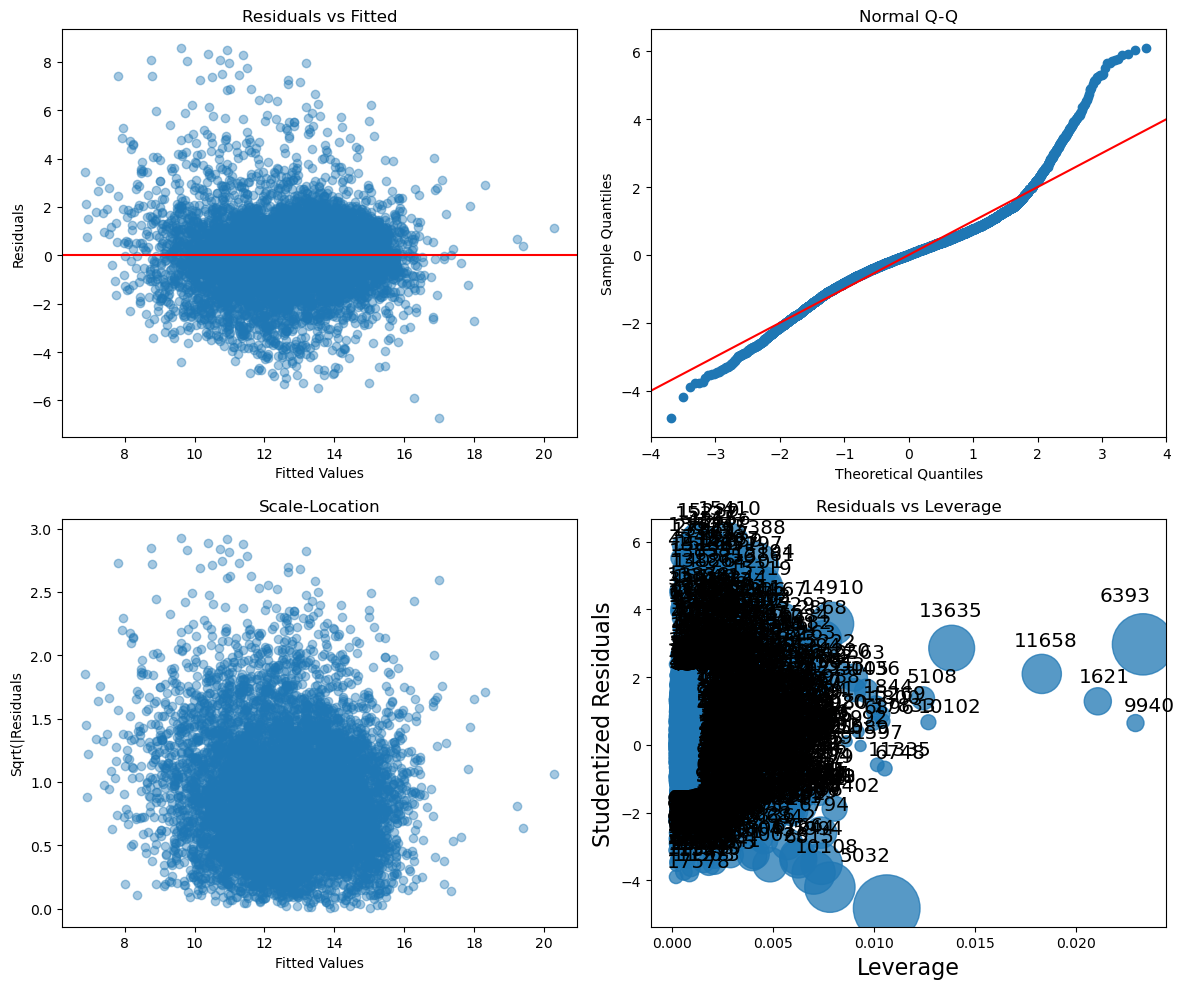

In [32]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(acrefit2.fittedvalues, acrefit2.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(acrefit2.get_influence().resid_studentized_internal, line="45", ax=axes[0,1])
axes[0,1].set_title("Normal Q-Q")
axes[0,1].set_xlim(-4,4)
axes[1,0].scatter(acrefit2.fittedvalues, np.sqrt(np.abs(acrefit2.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(acrefit2, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()


In [33]:
minnlandncvtest2 = ncvTest(acrefit2.resid, acrefit2.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, minnlandncvtest2):
    print(f"{stat}:{score: .4f}")

BP statistic: 896.8721
BP p-value: 0.0000
f-value: 166.3737
f p-value: 0.0000


In [34]:
rstudent = OLSInfluence(acrefit2).resid_studentized_external

df = acrefit2.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)

outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
15289  6.114509        1.009963e-09          0.000009
15327  6.055649        1.456070e-09          0.000013
15410  5.934305        3.062983e-09          0.000027
13845  5.892445        3.945718e-09          0.000035
15156  5.770626        8.166219e-09          0.000072
4165   5.750380        9.202834e-09          0.000081
2791   5.723111        1.080320e-08          0.000095
13829  5.675384        1.427829e-08          0.000125
15247  5.661144        1.551066e-08          0.000136
4232   5.510027        3.689463e-08          0.000324

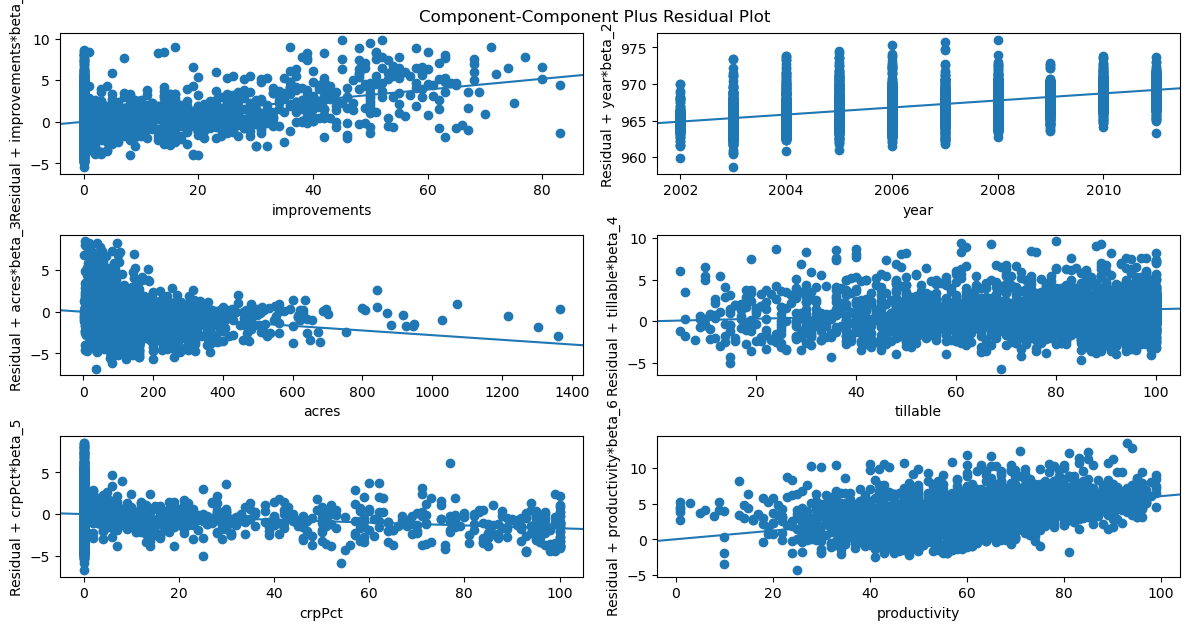

<Wald test (chi2): statistic=109.66464624510763, p-value=1.5368257828502683e-24, df_denom=2>


In [35]:
fig = sm.graphics.plot_ccpr_grid(acrefit2, fig=plt.figure(figsize=(12,8)))
plt.show() 
print(sm.stats.diagnostic.linear_reset(acrefit2))

In [36]:
Y_log = np.log(MinnLandclean["acrePrice"])
acrefit3 = sm.OLS(Y_log, X_cons).fit()

print(acrefit3.summary())

                            OLS Regression Results                            
Dep. Variable:              acrePrice   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1847.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:09:31   Log-Likelihood:                -3623.1
No. Observations:                8770   AIC:                             7260.
Df Residuals:                    8763   BIC:                             7310.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -237.5702      3.248    -73.153   

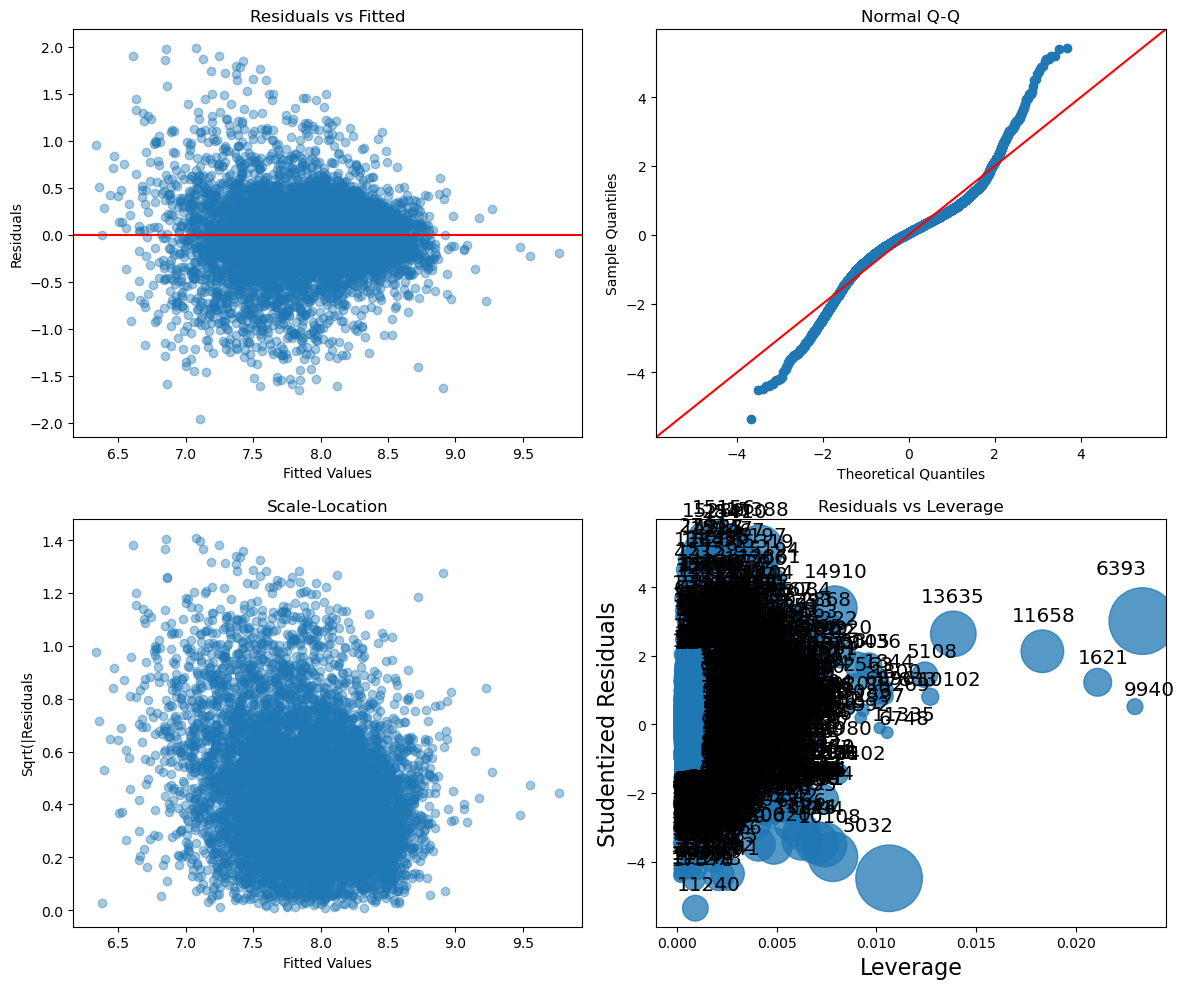

In [37]:
fix, axes = plt.subplots(2,2, figsize=(12,10)) 

axes[0,0].scatter(acrefit3.fittedvalues, acrefit3.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(acrefit3.get_influence().resid_studentized_internal, line="45", ax=axes[0,1])
axes[0,1].set_title("Normal Q-Q")
axes[1,0].scatter(acrefit3.fittedvalues, np.sqrt(np.abs(acrefit3.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(acrefit3, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()


In [38]:
minnlandncvtest3 = ncvTest(acrefit3.resid, acrefit3.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, minnlandncvtest3):
    print(f"{stat}:{score: .4f}")

BP statistic: 1157.5369
BP p-value: 0.0000
f-value: 222.0809
f p-value: 0.0000


In [39]:
rstudent = OLSInfluence(acrefit3).resid_studentized_external

df = acrefit3.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)

outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
15289  5.443475        5.366283e-08          0.000471
15156  5.404270        6.678171e-08          0.000586
11240 -5.350938        8.970984e-08          0.000787
2847   5.218665        1.843454e-07          0.001617
15410  5.217367        1.856369e-07          0.001628
2791   5.116588        3.177089e-07          0.002786
15388  5.109444        3.299234e-07          0.002893
15327  5.046996        4.578326e-07          0.004015
4165   4.920893        8.771985e-07          0.007693
15247  4.896881        9.911073e-07          0.008692

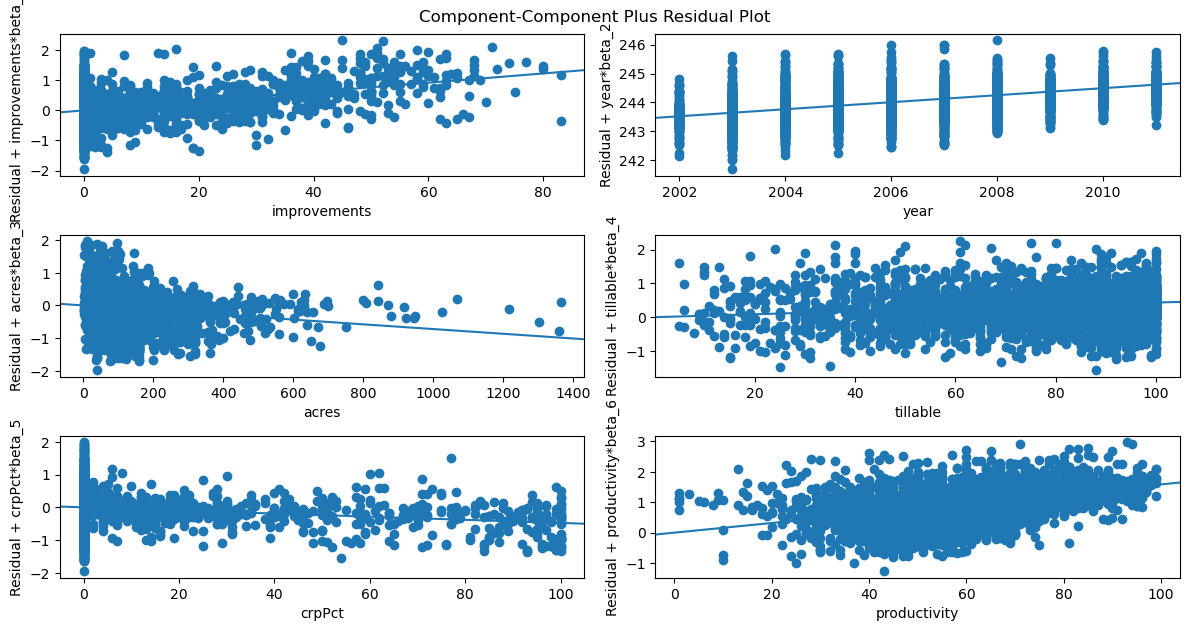

<Wald test (chi2): statistic=66.74123528687326, p-value=3.2160656075751897e-15, df_denom=2>


In [40]:
fig = sm.graphics.plot_ccpr_grid(acrefit3, fig=plt.figure(figsize=(12,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(acrefit3))


We are still seeing some violations, especially with the non-constant variance. Our overall model shows linearity, however there are several predictors that do not. Usually, the global passing the linearity check is fine, but for better inferences we also want to address the predictors. Normality is still violated as well. Now, to try to address those, we can see about doing a transformation for the rest of the predictors.

In [41]:

cols = ["acrePrice", "improvements", "year", "acres", "tillable", "crpPct", "productivity"] 

gamma = 0.1
X_shifted = MinnLandclean[cols] + gamma

pt = PowerTransformer(method="box-cox", standardize = False)
pt.fit_transform(X_shifted)
print("Box-Cox lambdas (per column):")
for name, lam in zip(cols, pt.lambdas_):
    print(f"{name:12s}: {lam: .4f}")

Box-Cox lambdas (per column):
acrePrice   :  0.3570
improvements: -1.7391
year        : -2.7247
acres       :  0.1756
tillable    :  5.5233
crpPct      : -2.3295
productivity:  1.8505


Now we are seeing some transformation recommendations and some may lead to some interpretability issues. Normally, I would just use the log of acre prices and the log of acres as well since that was its actual recommendation, however, we will actually go with the recommended lambdas. Also, for certain transformations such as negative exponents and 0-exponent, we have to make sure we do not see any 0's for that particular variable or it will cause us problems when using logs or negative powers.

In [42]:
MinnLandclean2 = MinnLandclean.copy()
MinnLandclean2["improvements2"] = MinnLandclean2["improvements"] + 1 
MinnLandclean2["crpPct2"] = MinnLandclean2["crpPct"] + 1 
MinnLandclean2["improvements3"] = MinnLandclean2["improvements2"] ** -1.74
MinnLandclean2["year2"] = MinnLandclean2["year"] ** -2.72
MinnLandclean2["acres2"] = np.log(MinnLandclean2["acres"])
MinnLandclean2["tillable2"] = MinnLandclean2["tillable"] ** 5.52
MinnLandclean2["crpPct3"] = MinnLandclean2["crpPct2"] ** -2.33
MinnLandclean2["productivity2"] = MinnLandclean2["productivity"] ** 1.85


X_new = MinnLandclean2[["improvements3", "year2", "acres2", "tillable2", "crpPct3", "productivity2"]]
Y_new = MinnLandclean2["acrePrice"] ** .357
X_new_c = sm.add_constant(X_new)
acrefit4 = sm.OLS(Y_new, X_new_c).fit() 

print(acrefit4.summary())

                            OLS Regression Results                            
Dep. Variable:              acrePrice   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     587.0
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:10:23   Log-Likelihood:                -21317.
No. Observations:                8770   AIC:                         4.265e+04
Df Residuals:                    8764   BIC:                         4.269e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.0400      0.251     67.818

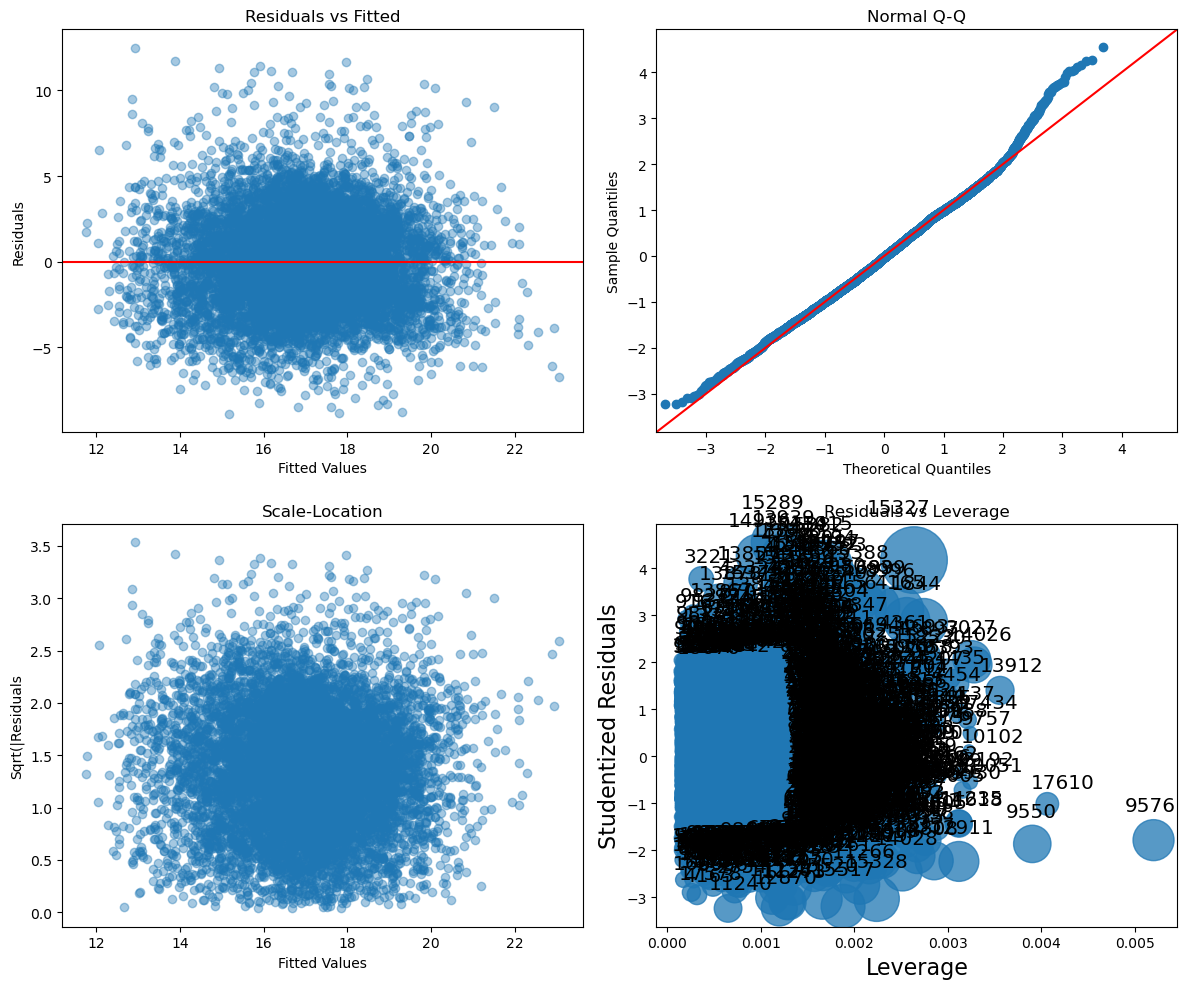

In [43]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(acrefit4.fittedvalues, acrefit4.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(acrefit4.get_influence().resid_studentized_internal, line="45", ax=axes[0,1])
axes[0,1].set_title("Normal Q-Q")
axes[1,0].scatter(acrefit4.fittedvalues, np.sqrt(np.abs(acrefit4.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(acrefit4, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()

In [44]:
minnlandncvtest4 = ncvTest(acrefit4.resid, acrefit4.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, minnlandncvtest4):
    print(f"{stat}:{score: .4f}")

BP statistic: 482.6726
BP p-value: 0.0000
f-value: 102.0870
f p-value: 0.0000


In [45]:
rstudent = OLSInfluence(acrefit4).resid_studentized_external

df = acrefit4.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)

outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
15289  4.550415            0.000005          0.047587
14936  4.270317            0.000020          0.172992
13939  4.248522            0.000022          0.190670
15327  4.171692            0.000031          0.267716
15410  4.113593            0.000039          0.344758
15382  4.055988            0.000050          0.441617
15415  4.037123            0.000055          0.478592
13845  4.021029            0.000058          0.512434
13856  3.983661            0.000068          0.599963
4288   3.892438            0.000100          0.876802

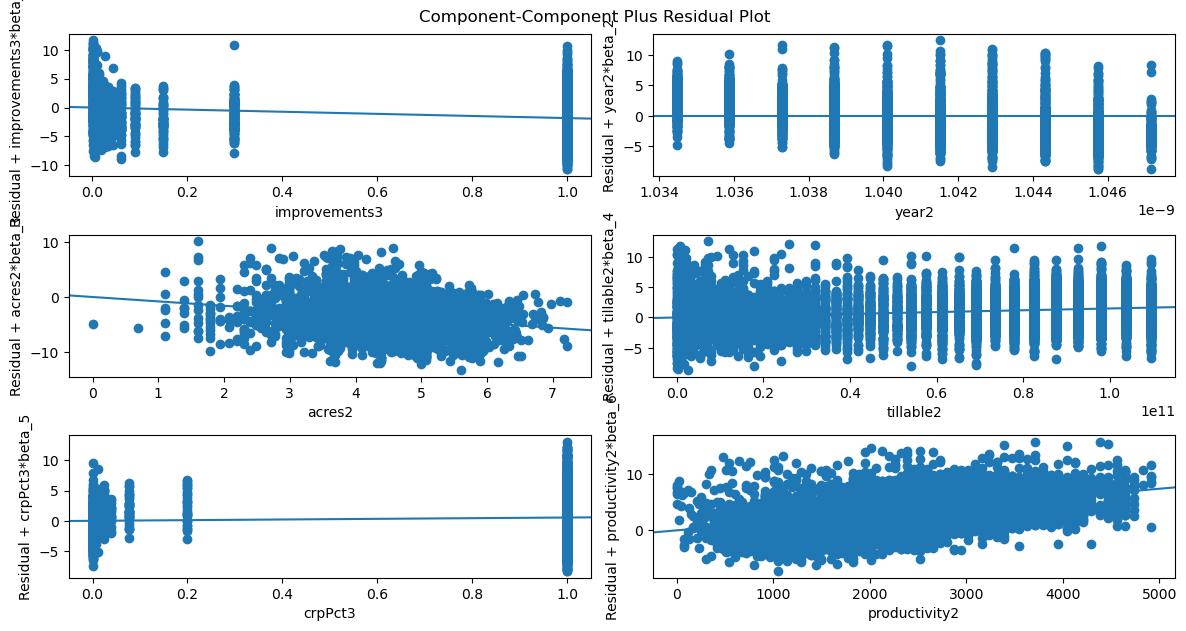

<Wald test (chi2): statistic=55.88849058971488, p-value=7.310860001202758e-13, df_denom=2>


In [46]:
fig = sm.graphics.plot_ccpr_grid(acrefit4, fig=plt.figure(figsize=(12,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(acrefit4))

Using the recommended transformations, it looks like our model fits much better, however there are still major violations. We still have heteroscedasticity, and now our overall model is less linear though some of the predictors are more linear than before. The biggest issue is the fact that we can barely interpret and explain this to any stakeholder. This would not be a good model for inference. 

Finally, I am going to use the transformation that I felt was more appropriate for the sake of being able to interpret the relationship. I will use a log transformation for both acre price and acres.

In [47]:
MinnLandnew = MinnLand.copy()
MinnLandnew = MinnLandnew.dropna(subset=["improvements", "year", "acres", "tillable", "crpPct", "productivity"])
MinnLandnew["acres_log"] = np.log(MinnLandnew["acres"])
X_log = MinnLandnew[["improvements", "year", "acres_log", "tillable", "crpPct", "productivity"]]
X_log = sm.add_constant(X_log)
acrefit5 = sm.OLS(Y_log, X_log).fit()

print(acrefit5.summary())

                            OLS Regression Results                            
Dep. Variable:              acrePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1895.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:11:13   Log-Likelihood:                -3559.7
No. Observations:                8770   AIC:                             7133.
Df Residuals:                    8763   BIC:                             7183.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -236.3575      3.226    -73.274   

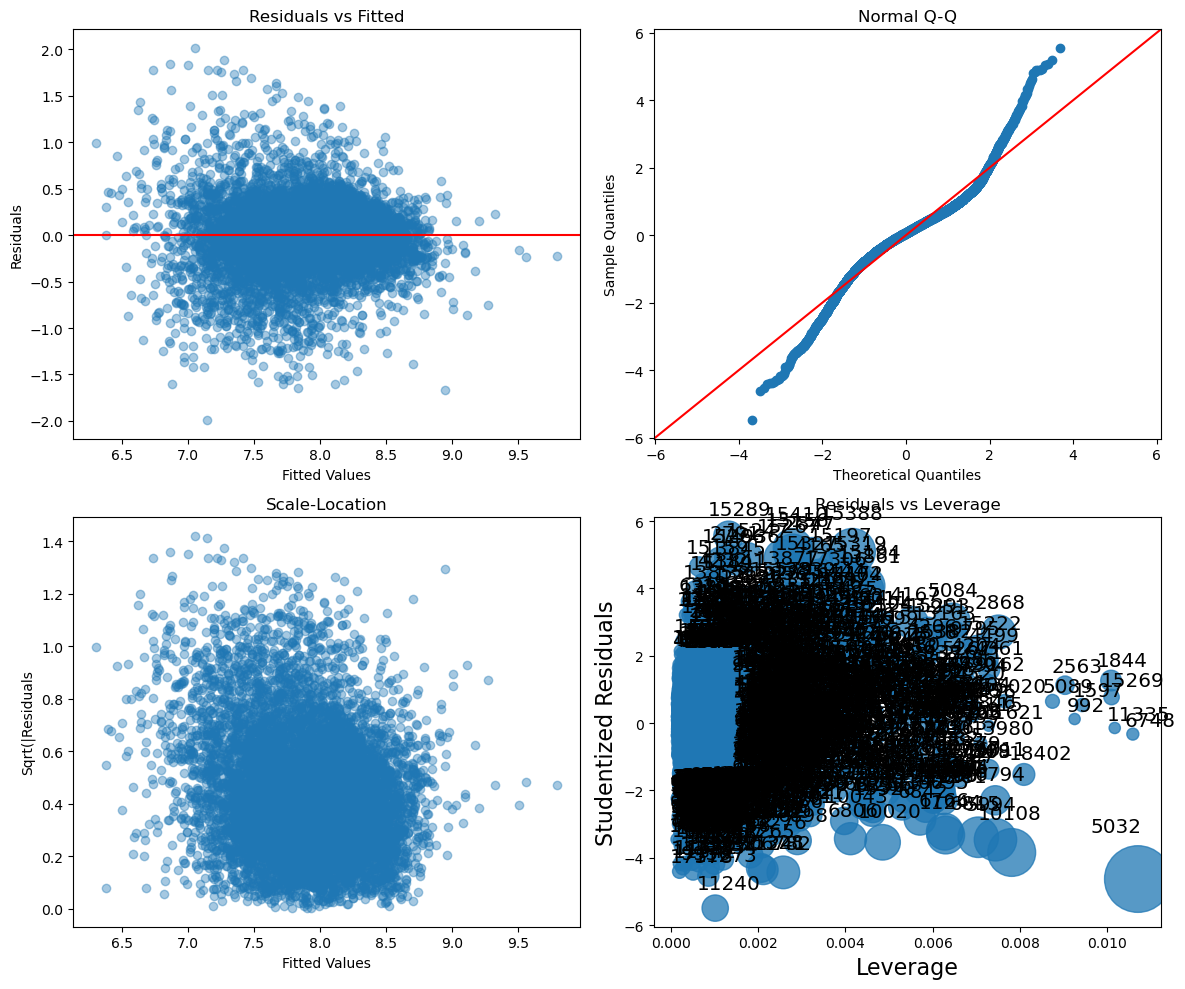

In [48]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(acrefit5.fittedvalues, acrefit5.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(acrefit5.get_influence().resid_studentized_internal, ax=axes[0,1], line="45")
axes[0,1].set_title("Normal Q-Q")
axes[1,0].scatter(acrefit5.fittedvalues, np.sqrt(np.abs(acrefit5.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(acrefit5, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()

In [49]:
minnlandncvtest5 = ncvTest(acrefit5.resid, acrefit5.model.exog)

labels = ["BP stastic", "BP p-value", "f-value", "p f-value"]

for stat, score in zip(labels, minnlandncvtest5):
    print(f"{stat}:{score: .4f}")

BP stastic: 1189.0958
BP p-value: 0.0000
f-value: 229.0854
p f-value: 0.0000


In [50]:
rstudent = OLSInfluence(acrefit5).resid_studentized_external

df = acrefit.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)

outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
15289  5.559561        2.783930e-08          0.000244
11240 -5.492900        4.064545e-08          0.000356
15410  5.197621        2.064060e-07          0.001810
15388  5.095190        3.556600e-07          0.003119
15156  5.049458        4.519903e-07          0.003964
2847   4.920105        8.807303e-07          0.007724
2791   4.915876        8.999050e-07          0.007892
15267  4.914665        9.054681e-07          0.007941
15247  4.912143        9.171644e-07          0.008044
15266  4.854821        1.225789e-06          0.010750

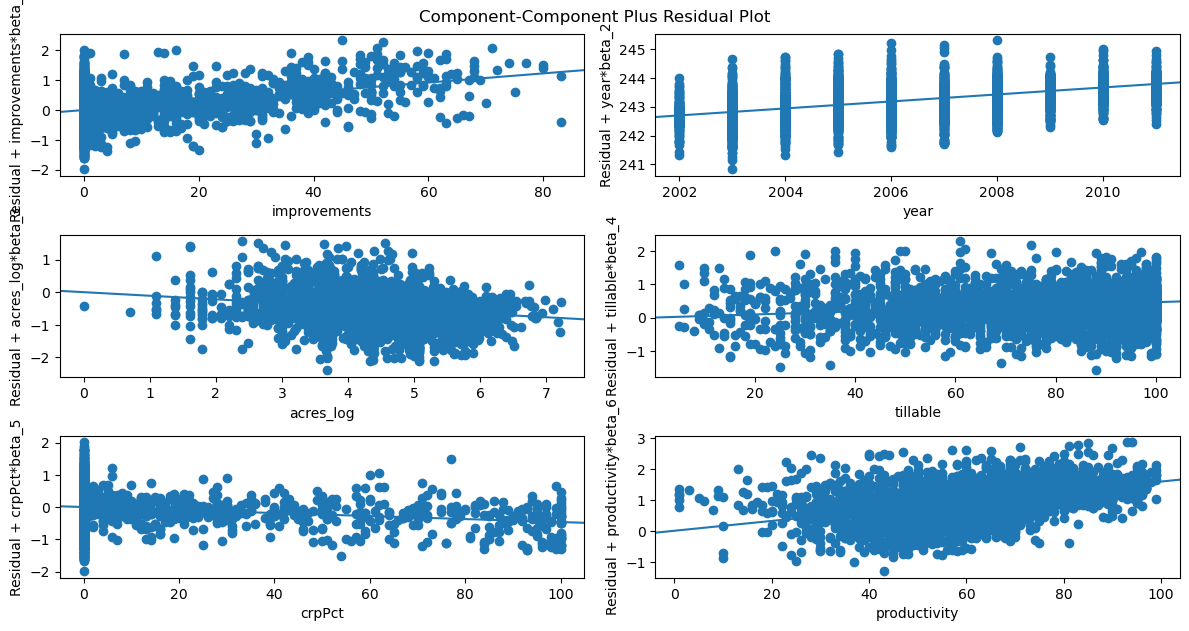

<Wald test (chi2): statistic=73.12049398064619, p-value=1.324605259351825e-16, df_denom=2>


In [51]:
fig = sm.graphics.plot_ccpr_grid(acrefit5, fig=plt.figure(figsize=(12,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(acrefit5))

Our assumptions still are not met which indicates that this model will be bad for interpretation. We an see about adding other higher ordered terms like interactions. We will still try to interpret the results however.
With all predictors at 0, our acre prices would be at -236.4. Again, this is seen as a tuning parameter. For every one unit increase of improvements, we see an increase of 1.538 dollars to acre price. Every unit increase of year will see an increase of 12.12 dollars. Every one percent increase of log acres sees a -.11098% decrease in the log price of acre prices. Every unit increase of tillable sees an increase of .462 dollars in acre price. Every unit increase of crpPct sees a decrease of .4658 of the price of acres. Lastly every unit increase of productivity sees an increase of 1.588 in the price of acres. 

For the last problem we will look at a data set pertaining to the 2000 election. Each observation consists of a county in Florida and the amount of votes they gave for each Presidential candidate, so all of this data is for Florida. There are three variables, "Bush", "Buchanan", "Gore"; we will use Bush as the response and just Buchanan as the predictor to look at the relationship of those who voted for Bush to those who voted for Buchanan. We will start with exploratory data analysis.

In [52]:
florida = pd.read_csv("http://users.stat.umn.edu/~sandy/alr4ed/data/florida.csv")
florida.head()

Unnamed: 0   Gore    Bush  Buchanan
0    ALACHUA  47300   34062       262
1      BAKER   2392    5610        73
2        BAY  18850   38637       248
3   BRADFORD   3072    5413        65
4    BREVARD  97318  115185       570

In [53]:
florida.describe()

Gore           Bush     Buchanan
count      67.000000      67.000000    67.000000
mean    43341.208955   43355.761194   258.462687
std     74833.262725   56989.418629   449.309582
min       788.000000    1316.000000     9.000000
25%      3055.000000    4746.500000    46.500000
50%     14152.000000   20196.000000   114.000000
75%     45974.000000   56541.500000   285.500000
max    386518.000000  289456.000000  3407.000000

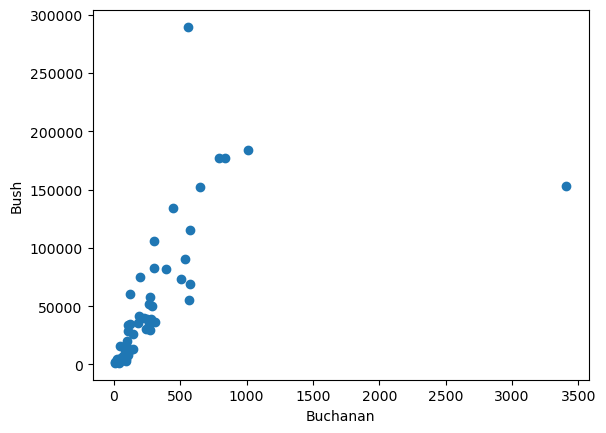

In [54]:
plt.figure()
plt.scatter(florida["Buchanan"], florida["Bush"])
plt.xlabel("Buchanan")
plt.ylabel("Bush")
plt.show()

Looking at the data and the chart, it may be suitable for us to do some sort of transformation on the response and predictor because the range goes over several orders of 10. Before doing that, we will go ahead and fit the model. 

In [55]:
Bush = florida["Bush"]
Buchanan = florida["Buchanan"]
Buchanan = sm.add_constant(Buchanan)
vote = sm.OLS(Bush, Buchanan).fit()

print(vote.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     41.37
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.73e-08
Time:                        22:12:03   Log-Likelihood:                -811.76
No. Observations:                  67   AIC:                             1628.
Df Residuals:                      65   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.291e+04   6338.830      3.614      0.0

In [56]:
floridancv = ncvTest(vote.resid, vote.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, floridancv):
    print(f"{stat},{score}")

BP statistic,14.878572184550174
BP p-value,0.00011465803379667246
f-value,18.55488678130746
f p-value,5.6990376220570697e-05


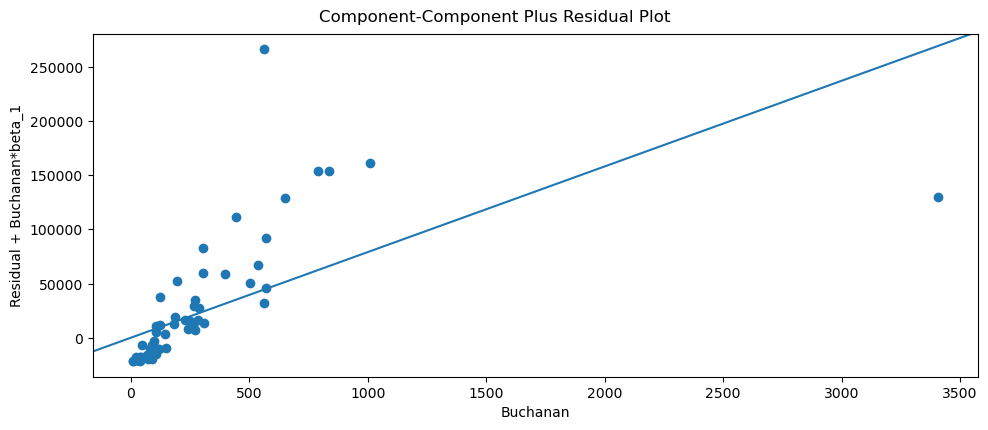

<Wald test (chi2): statistic=135.96357663063384, p-value=2.9914687110375692e-30, df_denom=2>


In [57]:
fig = sm.graphics.plot_ccpr_grid(vote, fig=plt.figure(figsize=(10,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(vote))

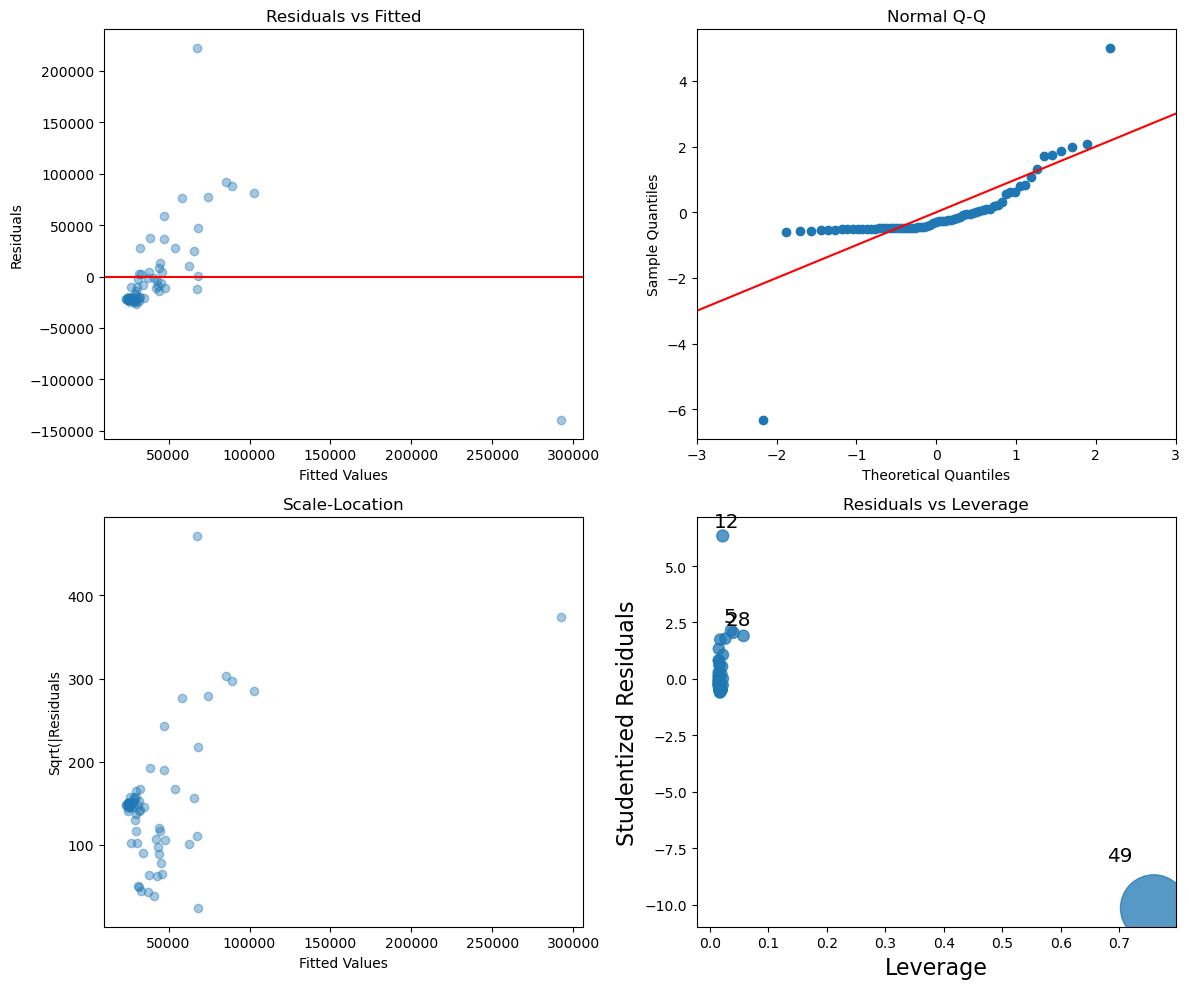

In [58]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(vote.fittedvalues, vote.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(vote.get_influence().resid_studentized_internal, ax=axes[0,1], line = "45")
axes[0,1].set_title("Normal Q-Q")
axes[0,1].set_xlim(-3,3)
axes[1,0].scatter(vote.fittedvalues, np.sqrt(np.abs(vote.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(vote, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()

Looking at the diagnostic tests, we fail several assumptions. We have heteroscedasticity and we do not have linearity. Normality is slightly off. We also see a leverage point for Palm Beach on the x space, this one is above the value of 1 in cook's distance. Dade is also an outlier as it too has a very low Bonferroni p-value is very small. We will see what transforming only the predictor does and see if that fixes any linearity or variance issues. 


regression-based best lambda: 0.29999999999992966


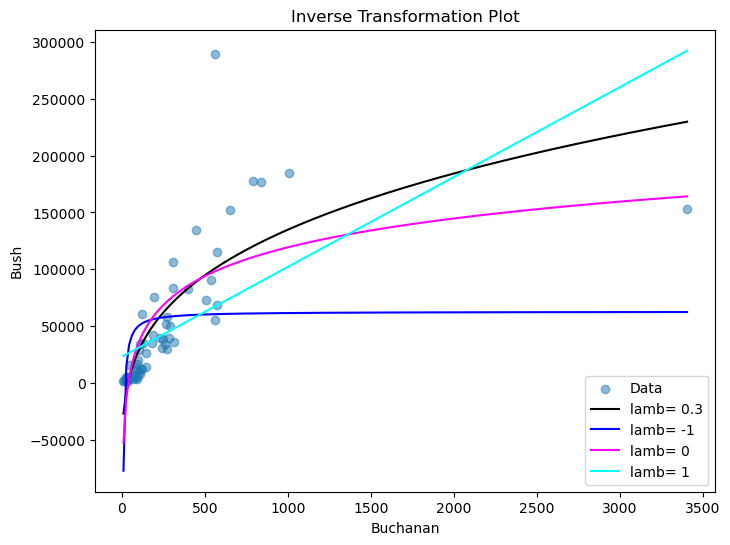

In [59]:
X  = florida["Buchanan"].to_numpy(dtype=float)
Y = florida["Bush"].to_numpy(dtype=float)
if np.any(X <= 0):
    eps = 1e-6
    X = X - X.min() + eps

def boxcox_x(X, lam):
    if lam == 0:
        return np.log(X)
    else:
        return (X**lam - 1) / lam

def rss_for_lambda(lam):
    X_t = boxcox_x(X, lam)
    model = sm.OLS(Y, sm.add_constant(X_t)).fit()
    return np.sum(model.resid**2)

grid = np.arange(-3.0, 3.01, 0.01)
rss_vals = np.array([rss_for_lambda(l) for l in grid])
best_lam = grid[np.argmin(rss_vals)]

print("regression-based best lambda:", best_lam)

lambdas = [0.3, -1, 0 ,1]
colors = ['black', 'blue', 'magenta', 'cyan']

plt.figure(figsize=(8,6))

plt.scatter(X, Y, alpha=0.5, label="Data")

for lam, col in zip(lambdas, colors):

    X_t = boxcox_x(X, lam)

    X_t_design = sm.add_constant(X_t)
    model = sm.OLS(Y, X_t_design).fit()

    x_grid = np.linspace(X.min(), X.max(), 200)
    x_grid_t = boxcox_x(x_grid, lam)
    y_hat = model.predict(sm.add_constant(x_grid_t))

    plt.plot(x_grid, y_hat, color=col, label=f"lamb= {lam:g}")

plt.xlabel("Buchanan")
plt.ylabel("Bush")
plt.title("Inverse Transformation Plot")
plt.legend()
plt.show()



The best exponent that was recommended to us was for .3. We know that is not very easy to explain, so we will go with the next best one which is a log transformation on the variable Buchanan. 

In [60]:
Buchanan_log = np.log(florida["Buchanan"])
Buchanan_log = sm.add_constant(Buchanan_log)
vote2 = sm.OLS(Bush, Buchanan_log).fit()
print(vote2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     95.43
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           2.24e-14
Time:                        22:12:05   Log-Likelihood:                -797.99
No. Observations:                  67   AIC:                             1600.
Df Residuals:                      65   BIC:                             1604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.336e+05   1.87e+04     -7.162      0.0

In [61]:
floridancvtest2 =ncvTest(vote2.resid, vote2.model.exog)

labels = ["BP statistics", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, floridancvtest2):
    print(f"{stat}:{score}")

BP statistics:3.3571550698767236
BP p-value:0.06691357278862423
f-value:3.4287448931859736
f p-value:0.06861365160747242


In [62]:
rstudent = OLSInfluence(vote2).resid_studentized_external

df = vote2.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)
outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value": pvals, "Bonferri p-value":pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
12  7.068820        1.310970e-09      1.310970e-09
5   1.909828        6.056982e-02      6.056982e-02
51  1.859717        6.745189e-02      6.745189e-02
28  1.838792        7.051463e-02      7.051463e-02
21  1.595265        1.155041e-01      1.155041e-01
33  1.469602        1.464935e-01      1.464935e-01
15  1.367915        1.760493e-01      1.760493e-01
47  1.250025        2.157724e-01      2.157724e-01
41 -1.206826        2.318730e-01      2.318730e-01
8  -1.152855        2.531921e-01      2.531921e-01

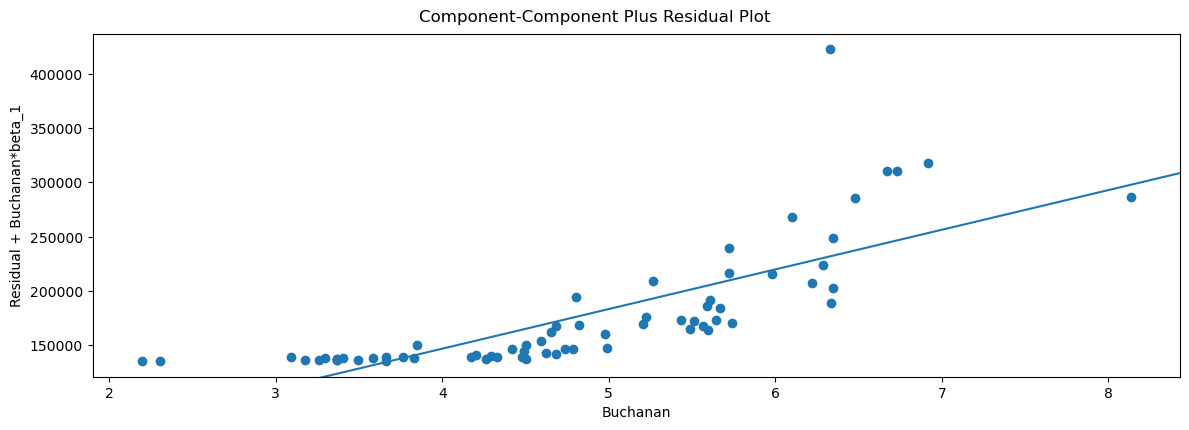

<Wald test (chi2): statistic=87.50685560456627, p-value=9.956982437777567e-20, df_denom=2>


In [63]:
fig = sm.graphics.plot_ccpr_grid(vote2, fig=plt.figure(figsize=(12,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(vote2))

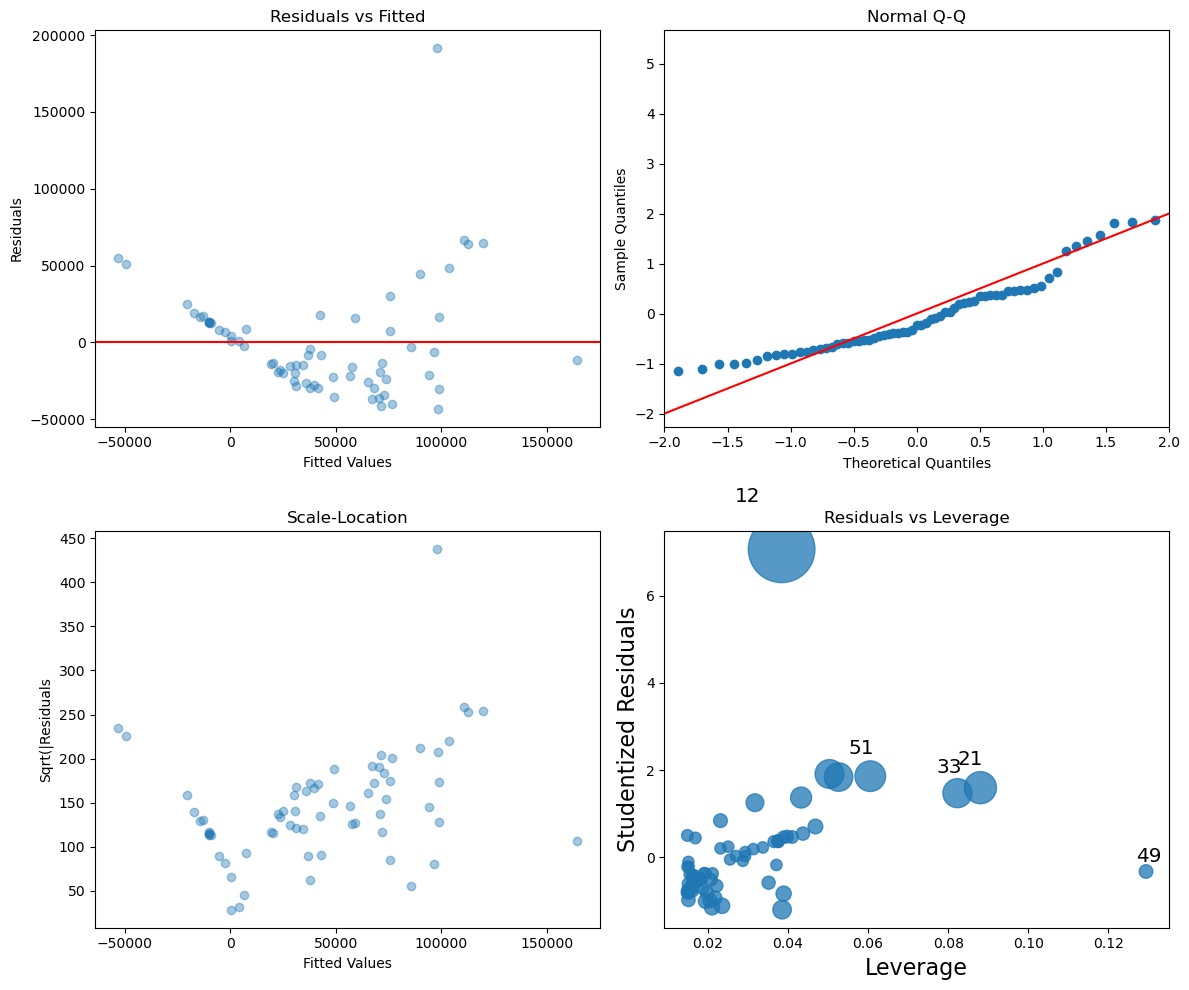

In [64]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(vote2.fittedvalues, vote2.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(vote2.get_influence().resid_studentized_internal, ax=axes[0,1], line="45")
axes[0,1].set_xlim(-2,2)
axes[0,1].set_title("Normal Q-Q")
axes[1,0].scatter(vote2.fittedvalues, np.sqrt(np.abs(vote2.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt(|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(vote2, ax=axes[1,1], criterion="cooks")
axes[1,1].set_title("Residuals vs Leverage")
plt.tight_layout()
plt.show()


The transformation allowed us to eliminate Palm Beach as an outlier, but that was about the only thing that was fixed. Perhaps the normality assumption was fixed a bit, but we still have a non-constant variance, we don't have linearity and Dad remains an outlier, though maybe not too influential as it lies between 1 and 0.5 of cook's distance. Let us see about transforming all variables to address normality, variance and possibly the linearity assumption.

In [65]:
pt = PowerTransformer(method="box-cox", standardize=False)

cols = ["Bush", "Buchanan"]

X = florida[cols]

pt.fit_transform(X)

for col,lam in zip(cols, pt.lambdas_):
    print(f"{col}:{lam}")

Bush:-0.0018762679980533995
Buchanan:-0.03344509020552418


The power transformation suggests that we do a log transformation for both the predictor and the response. This excellent because a long transformation is very easy to interpret. 

In [66]:
Bush_log = np.log(florida["Bush"]) 
vote3 = sm.OLS(Bush_log, Buchanan_log).fit()
print(vote3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     370.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.50e-28
Time:                        22:12:06   Log-Likelihood:                -56.253
No. Observations:                  67   AIC:                             116.5
Df Residuals:                      65   BIC:                             120.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3531      0.290     14.990      0.0

In [67]:
floridancvtest3 = ncvTest(vote3.resid, vote3.model.exog)

labels = ["BP statistic", "BP p-value", "f-value", "f p-value"]

for stat, score in zip(labels, floridancvtest3):
    print(f"{stat}:{score}")

BP statistic:0.7262137132599309
BP p-value:0.39411323128473996
f-value:0.7122558406073715
f p-value:0.40179130405869956


In [68]:
rstudent = OLSInfluence(vote3).resid_studentized_external

df = vote3.df_resid
pvals = 2 * (1 - t.cdf(np.abs(rstudent), df))
bonf_pvals = np.minimum(pvals * len(pvals), 1.0)

outlier_table = pd.DataFrame({"rstudent": rstudent, "unadjusted p-value":pvals, "Bonferri p-value": bonf_pvals})
outlier_table = outlier_table.sort_values("Bonferri p-value").head(10)
outlier_table

rstudent  unadjusted p-value  Bonferri p-value
49 -3.105483            0.002814          0.188549
6  -2.674913            0.009446          0.632884
0  -0.298888            0.765979          1.000000
36 -0.203438            0.839428          1.000000
37 -0.424701            0.672457          1.000000
38 -2.371829            0.020672          1.000000
39 -0.204639            0.838494          1.000000
40  0.565388            0.573757          1.000000
41 -0.979935            0.330751          1.000000
42  1.464994            0.147743          1.000000

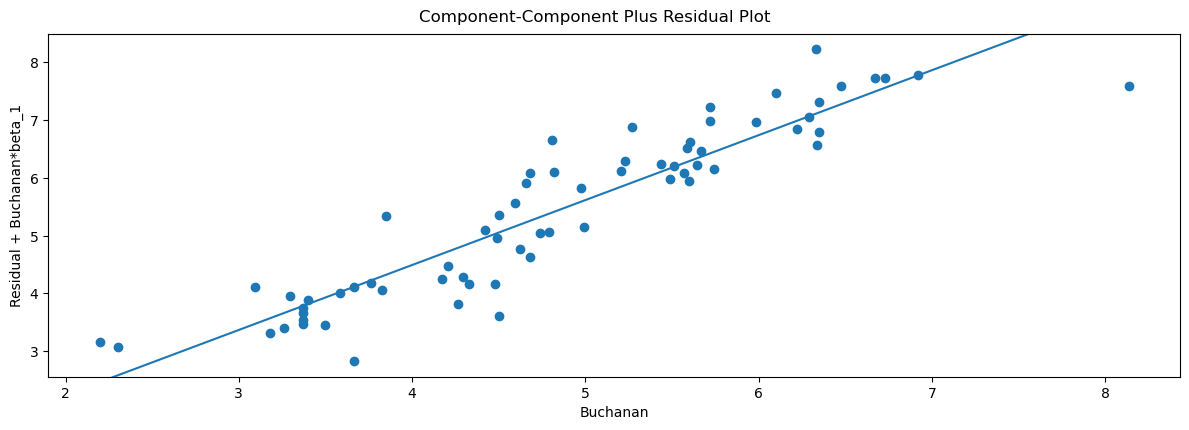

<Wald test (chi2): statistic=18.404737052597845, p-value=0.0001008003705443118, df_denom=2>


In [69]:
fig = sm.graphics.plot_ccpr_grid(vote3, fig=plt.figure(figsize=(12,8)))
plt.show()

print(sm.stats.diagnostic.linear_reset(vote3))

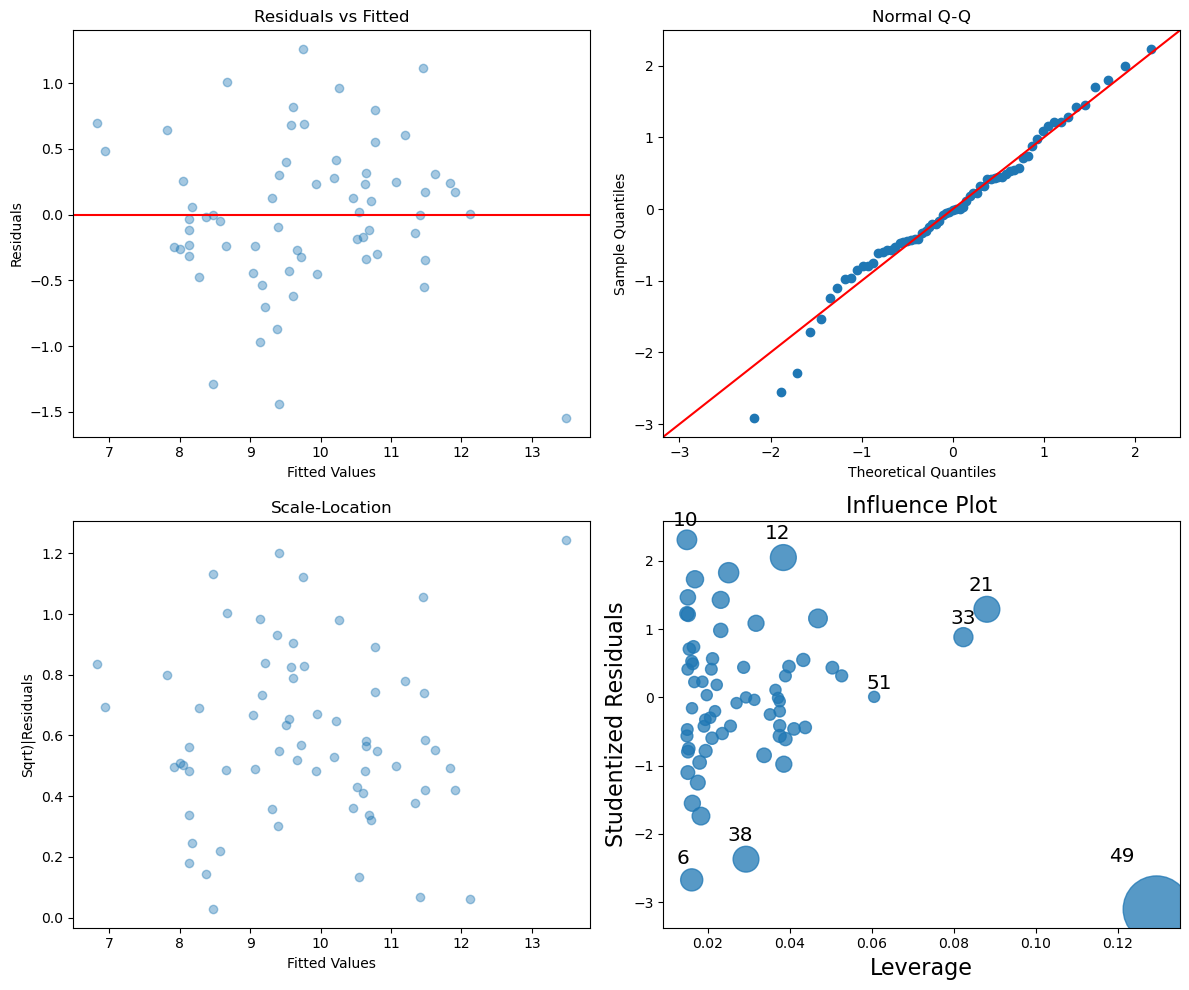

In [70]:
figs, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].scatter(vote3.fittedvalues, vote3.resid, alpha=0.4)
axes[0,0].axhline(0, color="red")
axes[0,0].set_xlabel("Fitted Values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("Residuals vs Fitted")
sm.qqplot(vote3.get_influence().resid_studentized_internal, ax=axes[0,1], line="45")
axes[0,1].set_title("Normal Q-Q")
axes[1,0].scatter(vote3.fittedvalues, np.sqrt(np.abs(vote3.resid)), alpha=0.4)
axes[1,0].set_xlabel("Fitted Values")
axes[1,0].set_ylabel("Sqrt)|Residuals")
axes[1,0].set_title("Scale-Location")
sm.graphics.influence_plot(vote3, ax=axes[1,1], criterion="cooks")
plt.tight_layout()
plt.show()

These transformations were good as now we have linearity and we have homoscedasticity. Normality does not seem to be too violated. Palm Beach is an outlier again, with Dade being taken care of. Let's see how influential the Palm Beach observation truly is. 


In [71]:
florida_new = florida.drop(index=49) 

Bush_new_log = np.log(florida_new["Bush"])
Buchanan_new_log = np.log(florida_new["Buchanan"])
Buchanan_new_log = sm.add_constant(Buchanan_new_log)
voteless = sm.OLS(Bush_new_log, Buchanan_new_log).fit()

print(voteless.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     413.0
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.29e-29
Time:                        22:12:07   Log-Likelihood:                -51.278
No. Observations:                  66   AIC:                             106.6
Df Residuals:                      64   BIC:                             110.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0814      0.287     14.246      0.0

In [72]:
print(vote3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     370.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.50e-28
Time:                        22:12:07   Log-Likelihood:                -56.253
No. Observations:                  67   AIC:                             116.5
Df Residuals:                      65   BIC:                             120.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3531      0.290     14.990      0.0

We see very little difference in the removal of the Palm Beach observation. That confirms it is not very influential. Looking at the full model with both log transformations says that for every 1% increase in log of Buchanan coincides with 1.18% increase in votes for Bush.